In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [ ]:
df = pd.read_csv("../data/processed/limpio1.csv")

## Escalado

In [5]:
X = df.drop(columns=["Hair Loss"])
scaler = StandardScaler()
X_scaled = X.copy()
X_scaled["Age"] = scaler.fit_transform(X[["Age"]])

## PCA

In [12]:
# PCA a 2 dimensiones para visualizar en 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [ ]:


# Convertimos a DataFrame
X_pca_df = pd.DataFrame(X_pca, columns=["PC1", "PC2"])

## KMeans

In [ ]:
# KMeans con 3 clusters (puedes ajustar este número)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_pca)

kmeans.fit(X_pca)
clusters = kmeans.predict(X_pca)


In [11]:
# Añadir resultados al DataFrame
X_pca_df["Cluster"] = clusters
X_pca_df["Hair Loss"] = df["Hair Loss"].values

## Visualizaciones

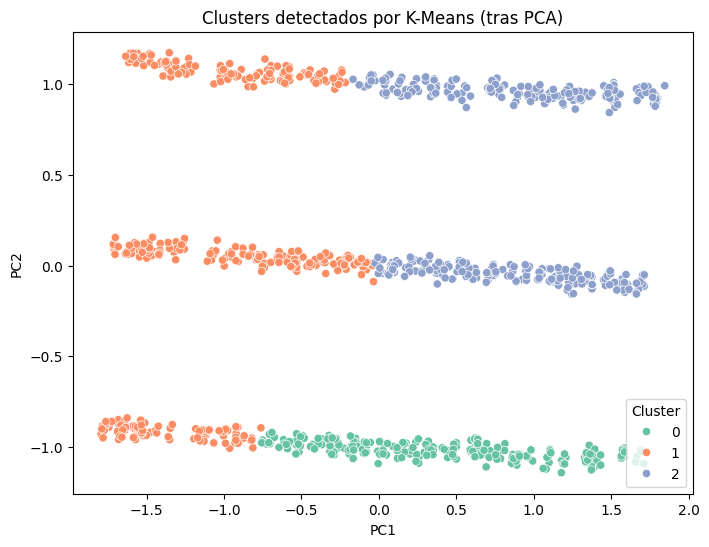

In [ ]:
# Clusters detectados (sin usar Hair Loss)
plt.figure(figsize=(8,6))
sns.scatterplot(data=X_pca_df, x="PC1", y="PC2", hue="Cluster", palette="Set2")
plt.title("Clusters detectados por K-Means (tras PCA)")
plt.show()


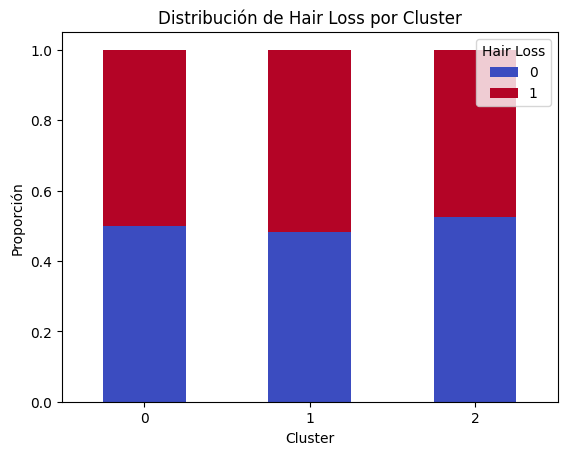

In [9]:
# Cómo se distribuye Hair Loss en cada cluster
# Proporción de Hair Loss por cluster
cluster_summary = X_pca_df.groupby("Cluster")["Hair Loss"].value_counts(normalize=True).unstack()

cluster_summary.plot(kind="bar", stacked=True, colormap="coolwarm")
plt.title("Distribución de Hair Loss por Cluster")
plt.ylabel("Proporción")
plt.xticks(rotation=0)
plt.show()


### PKL


In [13]:
import pickle

# Guardar PCA
with open("../models/M7-PCA.pkl", "wb") as f:
    pickle.dump(pca, f)

# Guardar KMeans
with open("../models/M7-kmeans.pkl", "wb") as f:
    pickle.dump(kmeans, f)


In [14]:
# Cargar PCA
with open("../models/M7-PCA.pkl", "rb") as f:
    pca_cargado = pickle.load(f)

# Cargar KMeans
with open("../models/M7-kmeans.pkl", "rb") as f:
    kmeans_cargado = pickle.load(f)

# Aplicar transformación y clustering
X_nuevo_pca = pca_cargado.transform(X_scaled)  # Usa los mismos datos escalados o nuevos
clusters_nuevos = kmeans_cargado.predict(X_nuevo_pca)
